<a href="https://colab.research.google.com/github/alencar-heitor/Colab-Notebook/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando

In [ ]:
try:
  import sklearn
  from sklearn import datasets
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import *
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
except Exception as err:
  print(err)


Carregando Database

In [ ]:
colesterol = pd.read_csv('/content/drive/MyDrive/DSA/Datasets/colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


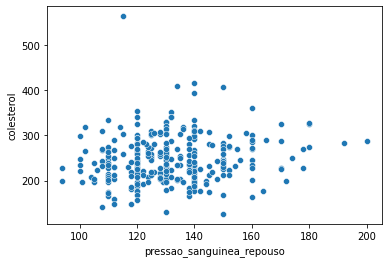

In [ ]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

Treinamento

In [ ]:
from sklearn.cluster import KMeans
SEED=24
n_grupos = 3
kmeans = KMeans(n_clusters = n_grupos, random_state = SEED)
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [ ]:
SEED=24
x_treino, x_teste = train_test_split(colesterol.select_dtypes(['int64', 'float64']), random_state = SEED)
print(x_treino.info())
print(x_teste.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 245 to 192
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         227 non-null    int64  
 1   genero                        227 non-null    int64  
 2   tipo_dor_peito                227 non-null    int64  
 3   pressao_sanguinea_repouso     227 non-null    int64  
 4   acucar_jejum                  227 non-null    int64  
 5   resultado_eletrocardio        227 non-null    int64  
 6   freq_cardio_max               227 non-null    int64  
 7   angina_exercicio              227 non-null    int64  
 8   depressao_induzida_exercicio  227 non-null    float64
 9   inclinacao                    227 non-null    int64  
 10  diag_doenca_cardiaca          227 non-null    int64  
 11  colesterol                    227 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 23.1 KB
None
<class 'pa

In [ ]:
kmeans.fit(x_treino)
kmeans.predict(x_teste)
#kmeans.labels_

array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 1, 1, 1], dtype=int32)

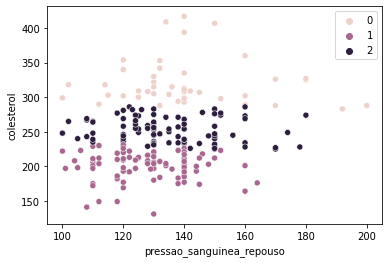

In [ ]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= x_treino, hue = kmeans.labels_)

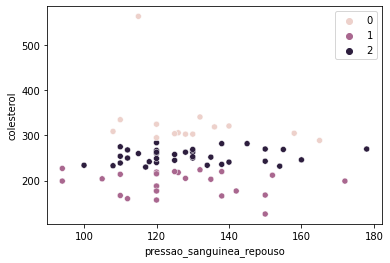

In [ ]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= x_teste, hue = kmeans.predict(x_teste))

In [ ]:
x_treino['clusters'] = kmeans.labels_
x_teste['clusters'] = kmeans.predict(x_teste)
print('Média Treino: ', x_treino.groupby('clusters')['colesterol'].mean())
print('Média Teste: ', x_teste.groupby('clusters')['colesterol'].mean())
print('Desvio Treino: ', x_treino.groupby('clusters')['colesterol'].std())
print('Desvio Teste: ', x_teste.groupby('clusters')['colesterol'].std())

Média Treino:  clusters
0    319.978261
1    200.431818
2    252.408602
Name: colesterol, dtype: float64
Média Teste:  clusters
0    327.600000
1    193.240000
2    254.777778
Name: colesterol, dtype: float64
Desvio Treino:  clusters
0    32.856922
1    20.100778
2    17.407043
Name: colesterol, dtype: float64
Desvio Teste:  clusters
0    67.055201
1    26.051679
2    15.469991
Name: colesterol, dtype: float64


In [ ]:
colesterol['clusters'] = kmeans.predict(colesterol.select_dtypes(['int64', 'float64']))
print(colesterol.groupby('clusters')['colesterol'].mean())
print(colesterol.groupby('clusters')['colesterol'].std())

clusters
0    321.852459
1    198.840708
2    253.069767
Name: colesterol, dtype: float64
clusters
0    43.241121
1    21.639731
2    16.863045
Name: colesterol, dtype: float64


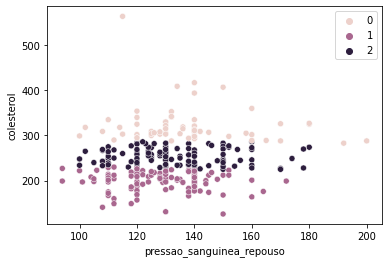

In [ ]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, 
                hue = kmeans.predict(colesterol.select_dtypes(['int64', 'float64'])))